In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("customer_support_tickets.csv")

In [3]:
df.drop(columns=['Customer Name', 'Customer Email'], inplace=True) 
df.dropna(subset=['Ticket Description'], inplace=True)  

In [10]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

In [11]:
df['Processed Description'] = df['Ticket Description'].apply(preprocess_text)
all_words = [word for desc in df['Processed Description'] for word in desc]
common_words = Counter(all_words).most_common(10)

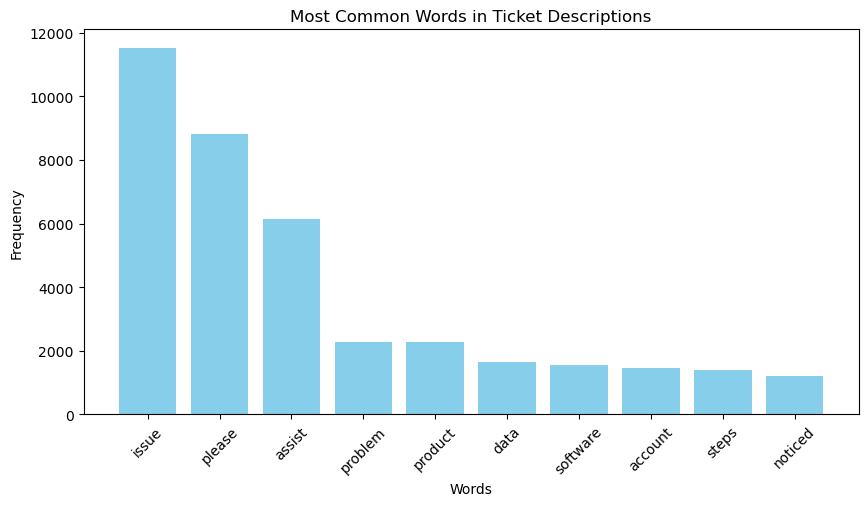

In [12]:
words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
plt.bar(words, counts, color='skyblue')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words in Ticket Descriptions")
plt.xticks(rotation=45)
plt.show()

In [13]:
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')
df['Resolution Time (hours)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

In [14]:
report = {
    "Total Tickets": len(df),
    "Unresolved Tickets": df['Resolution'].isna().sum(),
    "Avg Resolution Time (hrs)": df['Resolution Time (hours)'].mean(),
    "Most Common Issues": common_words
}
print("Summary Report:")
for key, value in report.items():
    print(f"{key}: {value}")

Summary Report:
Total Tickets: 8469
Unresolved Tickets: 5700
Avg Resolution Time (hrs): -0.05770434573251475
Most Common Issues: [('issue', 11529), ('please', 8810), ('assist', 6147), ('problem', 2285), ('product', 2268), ('data', 1655), ('software', 1553), ('account', 1463), ('steps', 1390), ('noticed', 1208)]
